# Telco Customer Churn Prediction - Exploratory Data Analysis

## 1.0 Introduction

This Jupyter Notebook performs an initial exploratory data analysis (EDA) and cleaning for the Telco Customer Churn dataset. The primary goal is to understand the dataset's structure, identify potential data quality issues, explore variable distributions, and uncover relationships that might influence customer churn. This analysis will inform subsequent feature engineering and model development.

In [4]:
import pandas as pd
import numpy as np # For potential future numerical operations, though maybe not directly needed now
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [5]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(f'Samples: {df.shape[0]}')
print(f'Features: {df.shape[1]}')
print('Number of unique values:')
print(df.nunique())
print(f'Missing values: {df.isna().values.sum()}')

Samples: 7043
Features: 21
Number of unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
Missing values: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#rename columns - to lower case
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## 2.0 Data Loading and Initial Inspection

* **Objective:** Load the dataset and perform initial checks on its structure, data types, and basic statistics.

### 2.1 Initial Data Overview

Observations from `df.head()`, `df.info()`, and `df.describe()`:
-   The dataset contains 7043 rows and 21 columns, including a unique `customerID` and the `Churn` target variable.
-   Most columns are of `object` (string) type, indicating categorical data. `tenure`, `MonthlyCharges`, and `TotalCharges` are initially identified as numerical.
-   `df.info()` showed no immediate missing values (NaNs).
-   `df.describe()` provides basic statistics for numerical columns, showing value ranges for `SeniorCitizen' `tenure`, and `MonthlyCharges`.

### 2.2 Column Renaming

* **Action:** All column names were converted to lowercase for consistency and ease of programming. This helps in avoiding issues with case sensitivity during column access.


In [12]:
#totalcharges is numeric field. Converting..
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [13]:
#check fo NaN values in totalcharges field.
df['totalcharges'].isna().sum()

11

In [14]:
#Since the total number (11) is small, we can safely drop them from the dataset
df.dropna(subset=['totalcharges'], inplace=True)
print(f'Total null values: {df["totalcharges"].isna().sum()}')

Total null values: 0


In [15]:
#converting churn feature to 1, or 0 for Yes/No
df['churn'] = df['churn'].map({'Yes':1, 'No':0})

In [16]:
#customerid feature cannot be used for modeling as it appears to be index column. 
#dropping customerid coulmn
#assert df['customerID'].nunique() == df.shape[0]
df.drop('customerid', axis=1, inplace=True)

## 3.0 Data Cleaning and Preprocessing

* **Objective:** Address data quality issues identified during initial inspection, focusing on data type corrections and handling of specific values.

### 3.1 Handling `totalcharges` Column

* **Observation:** Initial inspection revealed that the `totalcharges` column, despite being numerical in nature, was loaded as an `object` (string) data type. This was due to the presence of empty string values (`' '`) within the column, preventing proper numeric conversion.
* **Action Taken:**
    1.  Converted the `totalcharges` column to a numeric type using `pd.to_numeric(errors='coerce')`. This operation successfully converted the empty string values into `NaN` (Not a Number), making them detectable by `isnull()`.
    2.  Identified 11 rows where `totalcharges` became `NaN` after conversion.
    3.  **Decision:** Since it is a small fraction of the dataset, the `NaN` value rows were dropped. 

* **Impact:** `totalcharges` is now a numeric (float) column, and all missing values have been appropriately handled.

### 3.2 Converting Target Feature `churn`
* **Observation:** The target variable initially was Yes/No string format
* **Action Taken:** Converted `churn` to binary numerical format (`1` for `Yes` and `0` for `No`). This is standard practice for binary classification tasks and is required by most of the machine learning algorithms.

### 3.3 Dropping `customerid`
* **Observation:** The `customerid` column is a unique identifier for each customer.
* **Action Taken:** This column was dropped from the DataFrame as it carries no predective information for the model.

```python
# Example Code
assert df['customerID'].nunique() == df.shape[0]
df.drop('customerid', axis=1, inplace=True)

In [18]:
#check for duplicates
print(df.duplicated().sum())
# as each row is a sample for each customer (based on customerid index, these records are assumed to be from different customers)

22


In [19]:
#cehck for missing values
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
#grouping features into types
target_feature = 'churn'
demographic = ['gender', 'seniorcitizen', 'partner', 'dependents']
numeric = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

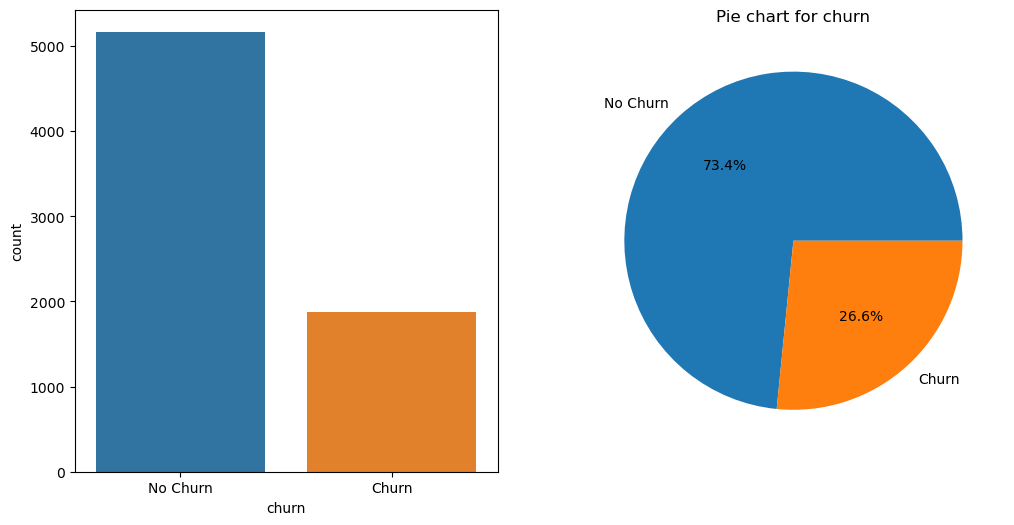

In [21]:
#distribution of target feature: churn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x=target_feature)
plt.subplot(1, 2, 2)
ax.set_xticklabels(['No Churn', 'Churn'])
plt.pie(df[target_feature].value_counts(normalize=True), autopct='%1.1f%%', labels=['No Churn', 'Churn'])
plt.title(f'Pie chart for {target_feature}')
plt.show()

### Visualize Distribution of Each Categorical Feature

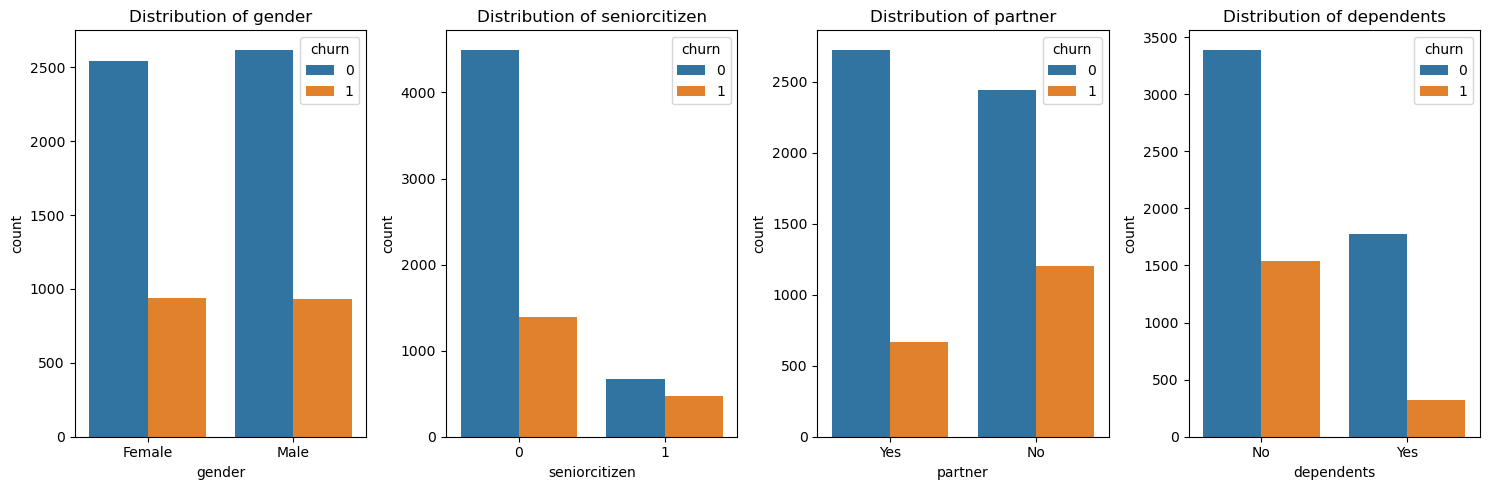

In [32]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(demographic):
    plt.subplot(1, len(demographic), i+1)
    sns.countplot(data=df, x=col, hue=target_feature)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

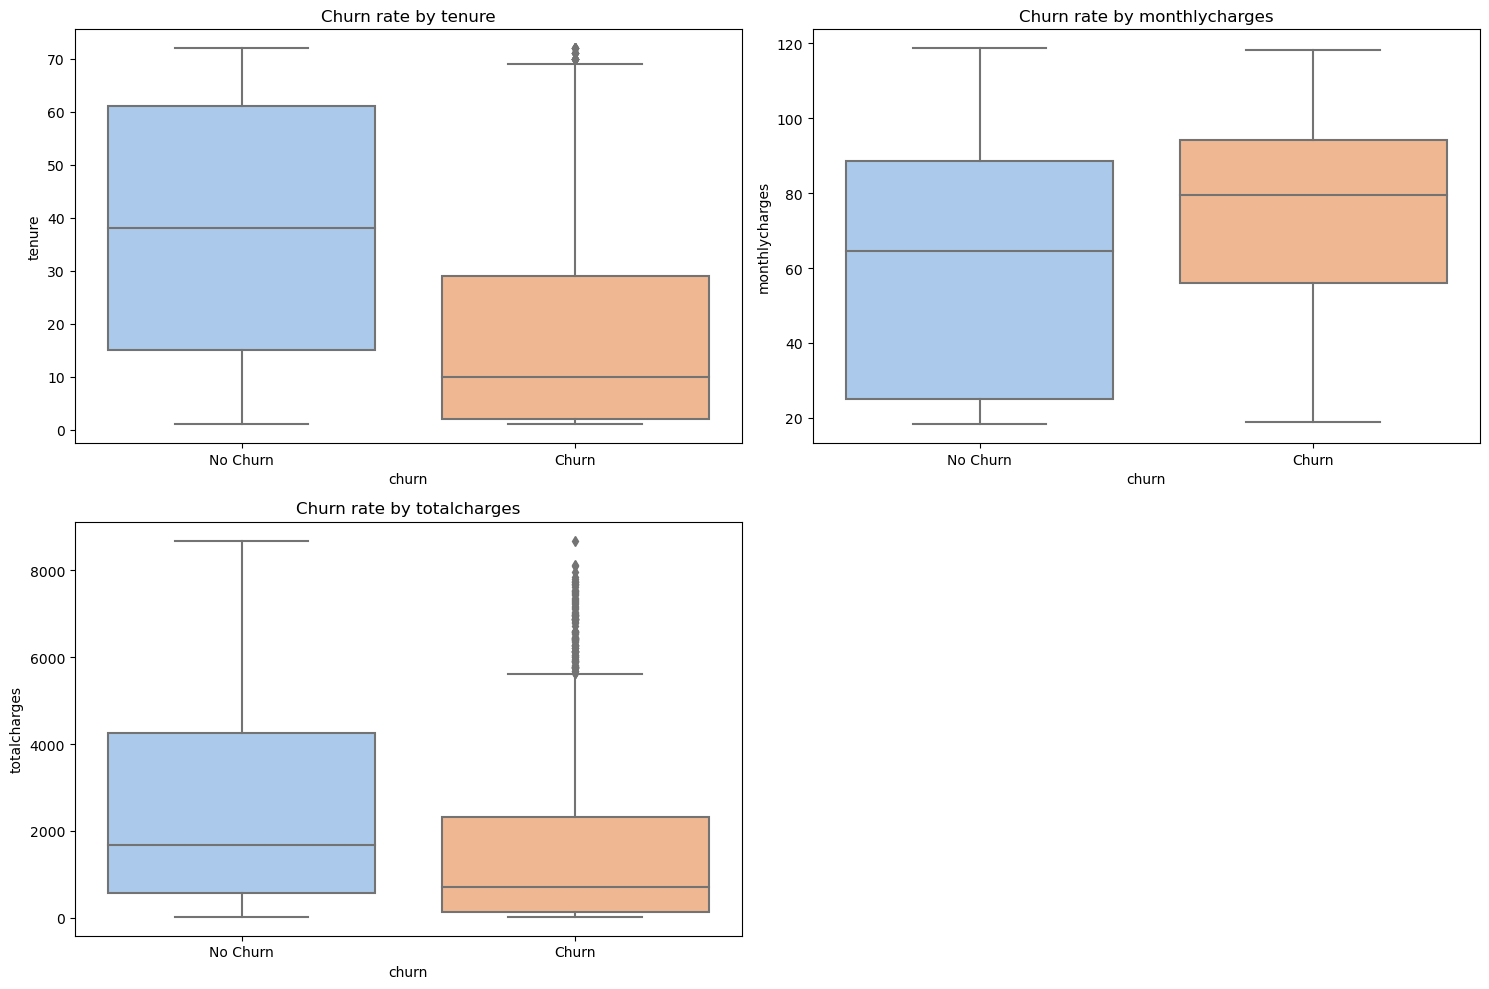

In [92]:
#numeric features distributions. 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=target_feature, y=col, palette='pastel')
    plt.title(f'Churn rate by {col}')
    plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

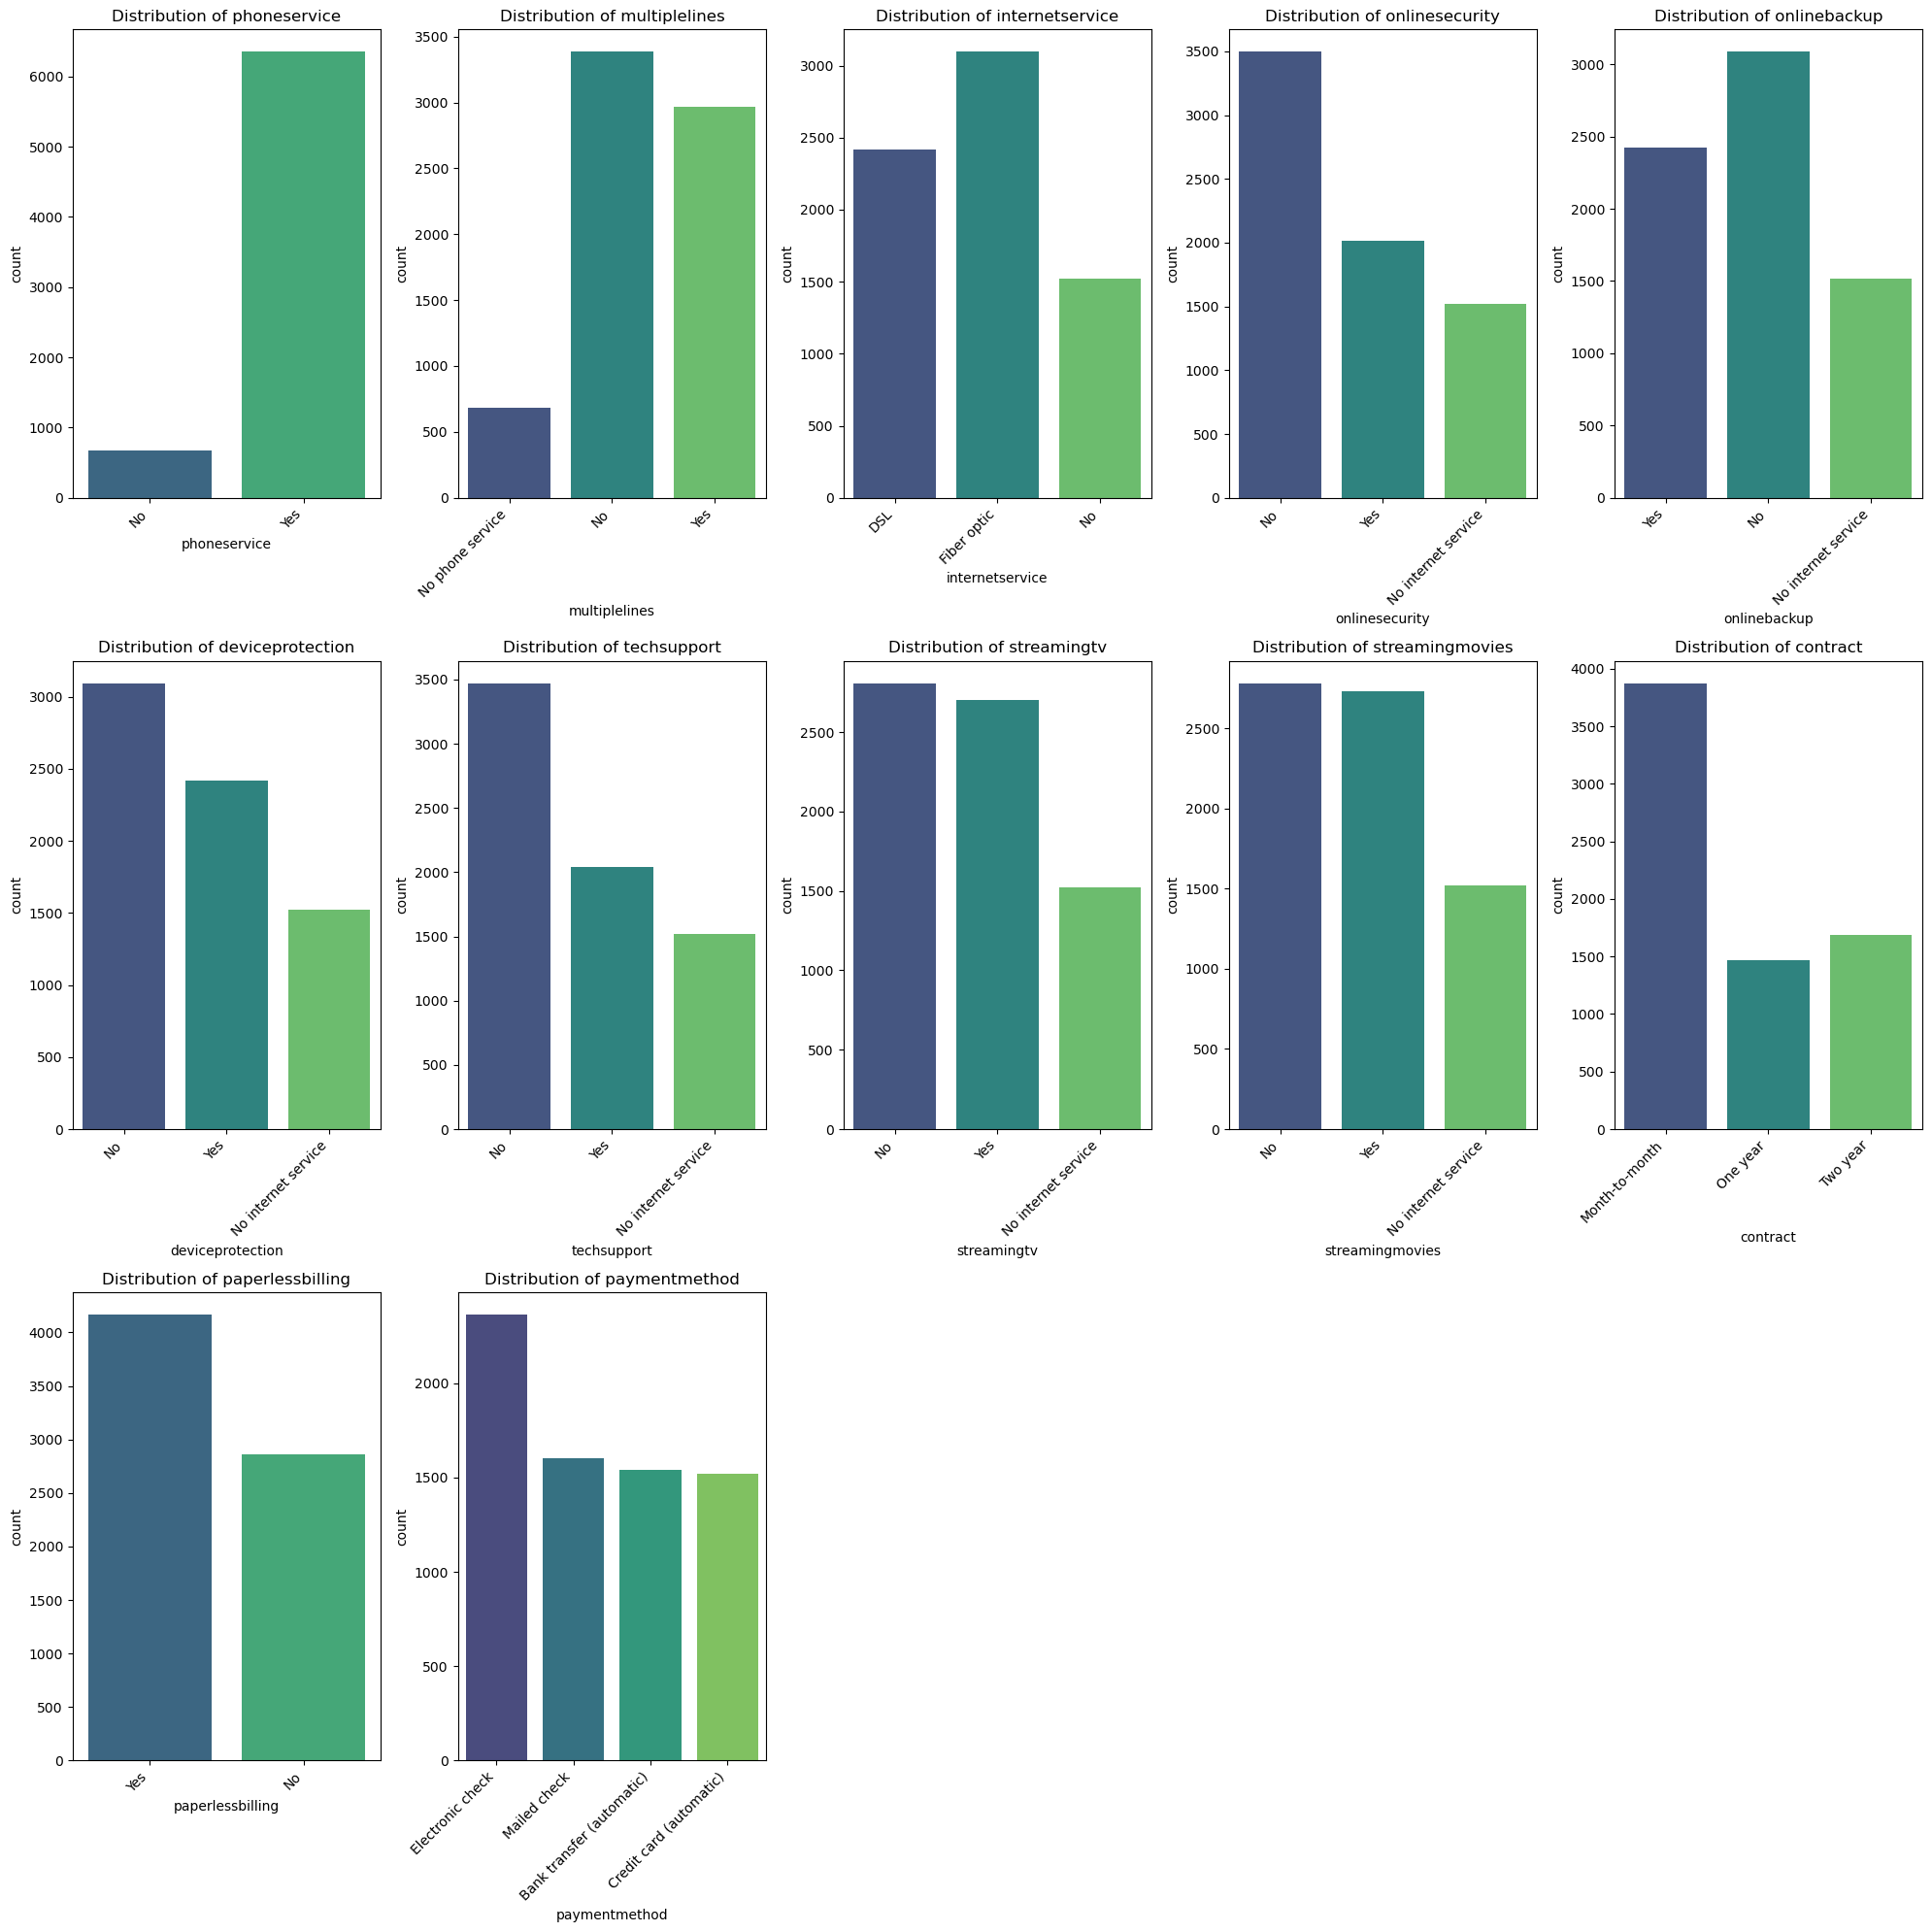

In [94]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical):
    plt.subplot(3, 5, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analyze Churn Rate by Categorical Feature
Group each feature and calculate the churn rate (since churn is now binary, the mean represents the churn rate)

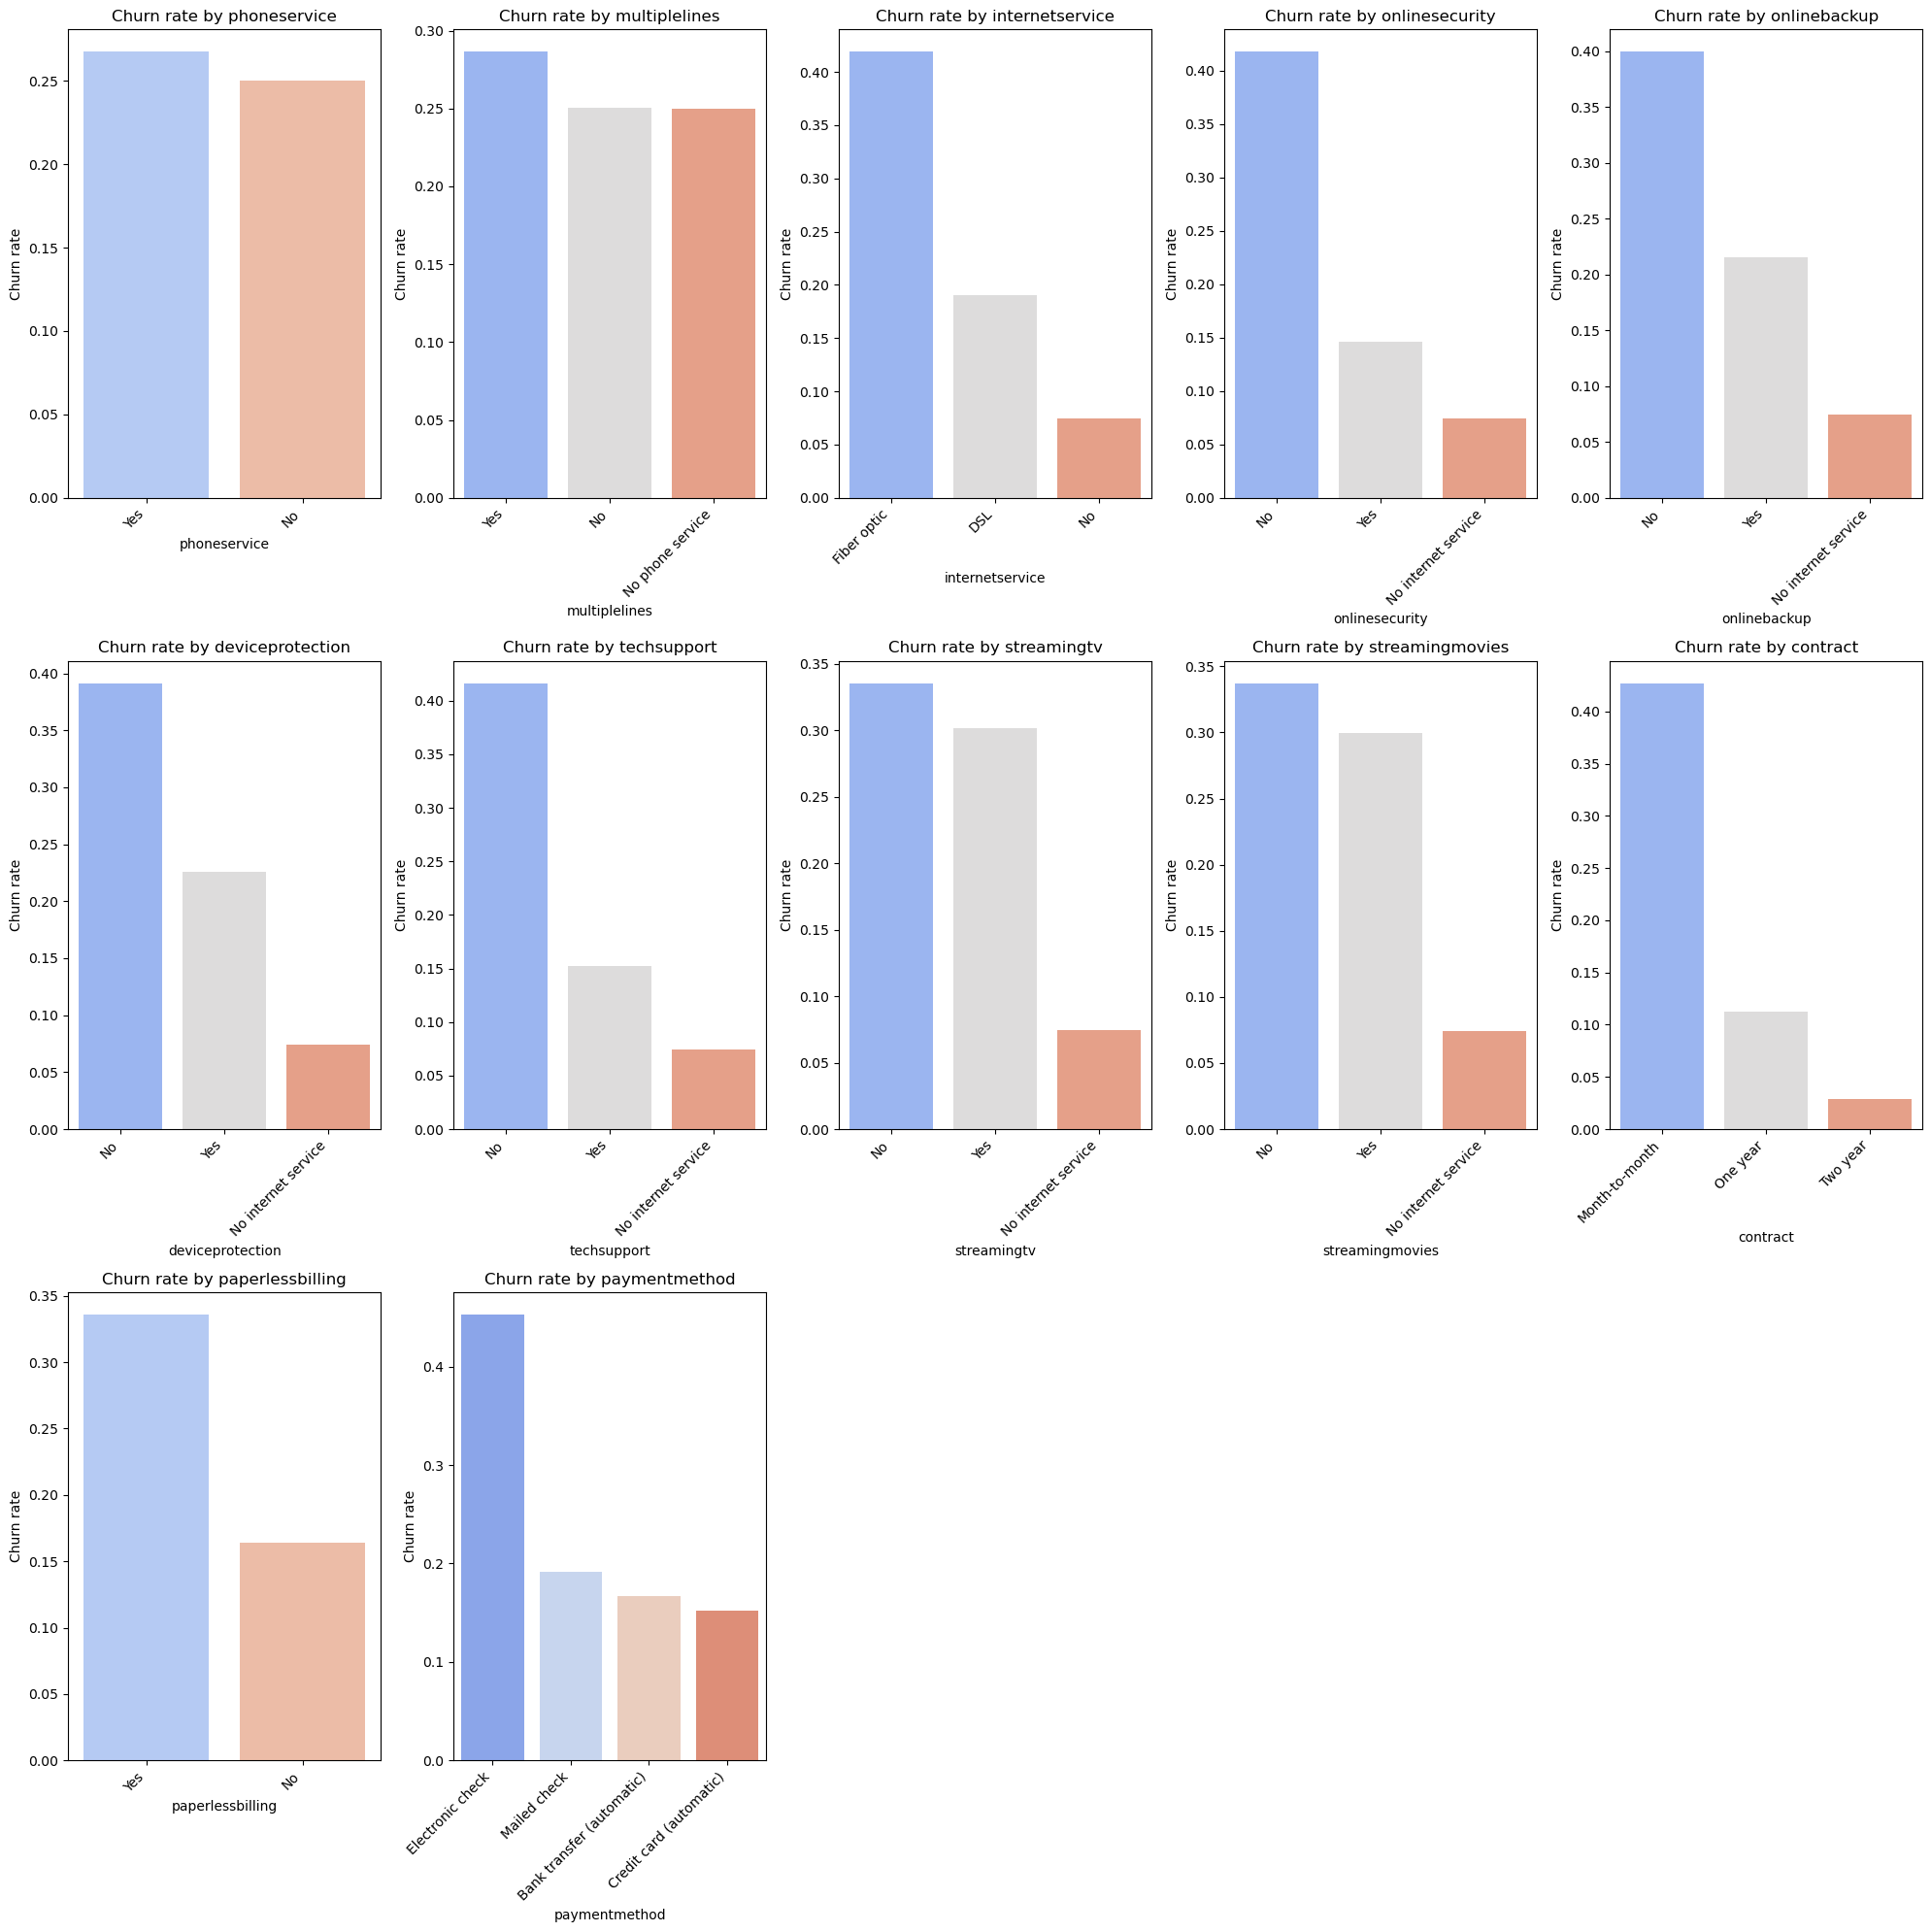

In [27]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical):
    plt.subplot(3, 5, i+1)
    churn_rate = df.groupby(col)[target_feature].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='coolwarm')
    plt.title('Churn rate by '+col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Churn rate')
plt.tight_layout()
plt.show()
    

### Correlation between numeric features.

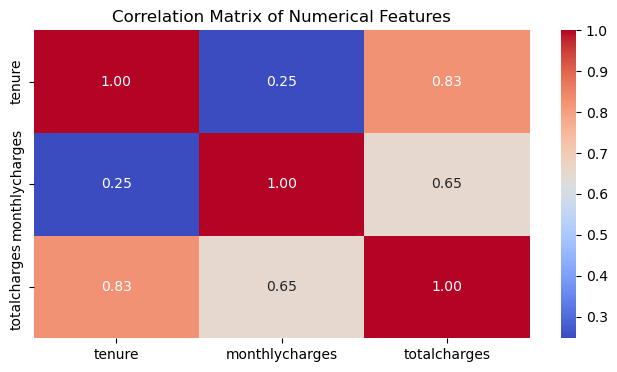

In [34]:
corr = df[numeric].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### tenure and total charges are strongly correlated
#### monthly charges and total charges are moderately related.

## 6.0 Summary of Exploratory Data Analysis Findings and Next steps
The EDA has provided significant insights into the Teclo Customer Churn dataset:  
* **Dataset Size and Quality:** The dataset is relatively clean with `NaN`s in `totalcharges` successfully handled by converting this column to numeric.
* **Target variable:** The `churn` rate is approximately 26.6% churn vs 73.4% no churn. This indicates a slight class imbalance, which might need to be addresses during modeling.
* **Demographic Features:**
    - `gender` does not appear to be strong predictor of churn.
    - `seniorcitizen` Churn is heigher in senior citizens than non-senior citizens.
    - `partners` Customers with partners tend to churn less.
    - `dependents` Customers with dependents tend to churn less.
* **Service-Related Features:**
    * **Internet Service:** Fiber Optic internet service is strongly associated with higher churn rates compared to DSL or no internet service.
    * **Security & Support:** Customers without online security, online backup, device protection, or tech support churn significantly more. This suggests these add-on services act as strong retention factors.
    * **Phone Service:** Phone service itself doesn't show a strong relationship with churn, but multiple lines might.
    * **Streaming:** Streaming TV/Movies might have a [weak/strong] impact on churn.
* **Contract & Billing Features:**
    * **Contract:** Customers on Month-to-month contracts churn drastically more than those on one-year or two-year contracts. This is a major insight!
    * **Paperless Billing:** Customers opting for paperless billing show a higher churn rate.
    * **Payment Method:** Electronic check payment method has a remarkably high churn rate. This is another critical insight.
* **Numerical Features:**
    * **`tenure`:** Shorter tenure is strongly correlated with higher churn. Long-term customers are less likely to churn.
    * **`monthlycharges`:** Customers with higher monthly charges tend to churn more, especially those with fiber optic and multiple services.
    * **`totalcharges`:** Lower total charges (often due to short tenure) are associated with higher churn. Very high total charges also show some churn.
    * **Correlations:** `tenure` and `totalcharges` are highly positively correlated, which is expected.
